In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, t

### What is Hypothesis Testing ???

Step - 1: $ \\ $ 
Null Hypothesis (Status Quo): $ H_0 \ \Rightarrow \ \leq, \ \geq, \ = $ $ \\ $
Alternate Hypothesis (Bold claim): $ H_1 \ \Rightarrow \ >, \ <, \ \neq  $  

Step - 2:  
* Collect a sample of size n
* Compute the mean from this sample $ \bar{x} $

Step - 3:
Compute Test Statistic:  
* If population standard deviation is known $$ z = \frac{\bar{x} - \mu}{\sigma/\sqrt[2]{n}}$$

* If population standard deviation is unknown $$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

In [2]:
# calculate z score for sample distribution

def z_score(sam_size, sam_mean, pop_mean, pop_std):
    return (sam_mean - pop_mean) / (pop_std / sample_size**0.5)

Step - 4:
Decide significance level $ \alpha $. Lower $ \alpha $ means you need stronger evidence to reject Null Hypothesis.


Step - 5.1: Apply decision rule:

* If test statistic is z-score -

    * Two tailed z-test: $ \\ $
    $ |z| > z_\frac{\alpha}{2} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $
    $ \\ $
    
    * Right tailed z-test:  $ \\ $
    $ z > z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $
    $ \\ $
    
    * Left tailed z-test: $ \\ $
    $ z < -z_\alpha \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $
    $ \\ $
    
* If test statistic is t-score

    * Two tailed t-test: $ \\ $
    $ |t| > t_{n-1,\frac{\alpha}{2}} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $
    $ \\ $
    
    * Right tailed t-test: $ \\ $
    $ t > t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $
    $ \\ $
    
    * Left tailed t-test: $ \\ $
    $ t < t_{n-1,\alpha} \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $
    $ \\ $

Step - 5.2: Compute p-value $ P(Test \ Statistics | H_0) $
* For two tailed test: $ \\ $
$ p \ value = 2 * (1.0 - cdf(test \ statistic)) $
$ \\ $
* For one tailed test: 
$ \\ $
$ p \ value = (1.0 - cdf(test \ statistic)) $
$ \\ $
Now, $ \\ $
$ if (p \ value < \alpha) \Rightarrow Accept \ H_1 \ or \ Reject \ H_0 $

### Unknown standard deviation of population

#### Q-1: Pista House selling Hyderabadi Chicken Dum biryani claims that each parcel packet has 500 grams of biryani (also mentioned on the label of packet). You are sceptic of their claims and believe that on average each packet does not contain 500 grams of biryani. How do you prove your claim?

Step - 1:  
Null Hypothesis (Status Quo): 
$$ \\ H_0: \textbf{Each packet contains exactly 500 grams biryani} $$
Alternate Hypothesis (Bold claim): 
$$ \\ H_1: \textbf{Each packet does not contain 500 grams biryani} $$


Step - 2:  
* Collect a sample of size n = 10 $$ [ 450, 240, 475, 510, 490, 498, 492, 488, 505, 480 ] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$


In [3]:
sam_val = [450, 240, 475, 510, 490, 498, 492, 488, 505, 480]
sam_mean = sum(sam_val) / len(sam_val)
sam_mean

462.8

Step - 3:
Compute Test Statistic: 
* If population standard deviation is unknown 
$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

where, 

$$ s = \sqrt{\frac{\sum({x} - \bar{x})^2}{{n}-1}} $$

In [4]:
s = 0
n = len(sam_val)
for i in sam_val:
    s += (i - sam_mean)**2

sam_std = (s / (n-1))**0.5
sam_std

80.08578733666376

In [5]:
pop_mean = 500
sam_size = len(sam_val)
t_score = (sam_mean - pop_mean) / (sam_std / sam_size**0.5)
t_score

-1.4688839664364375

In [6]:
# Two tail test with 95% of confidence

# from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1 - alpha/2, df = 9)

t_critical

2.2621571627409915

Text(462.8, 0.0007, 'x_bar')

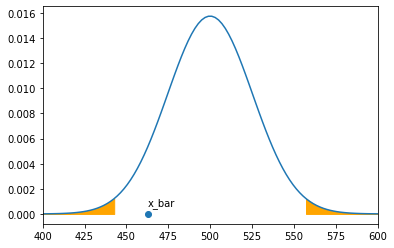

In [7]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 400
x_max = 600


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sam_std / sam_size**0.5


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the left and right critical values (Two tailed Test)
t_critical_left = pop_mean + (-t_critical * std)
t_critical_right = pop_mean + (t_critical * std)


# Shading the left rejection region
x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Shading the right rejection region
x2 = np.linspace(t_critical_right, x_max, 100)
y2 = norm.pdf(x2, mean, std)
plt.fill_between(x2, y2, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sam_mean, 0)
plt.annotate("x_bar", (sam_mean, 0.0007))

In [8]:
# Conclusion of this t test

if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [9]:
# Conclusion by p test

p_value = 1.0 - t.cdf(np.abs(t_score), df = 9)

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.08796463699424495
Fail to reject Null Hypothesis


#### Q-2: You have developed a new Natural Language Processing Algorithms and done a user study. You claim that the average rating given by the users is greater than 4 on a scale of 1 to 5. How do you prove this to your client?

Step - 1:  
Null Hypothesis (Status Quo): 
$$ \\ H_0: \textbf{Avg Rating  <= 4} $$
Alternate Hypothesis (Bold claim): 
$$ \\ H_1: \textbf{Avg Rating > 4} $$


Step - 2:  
* Collect a sample of size n = 10 $$ [ 5, 4, 5, 3, 5, 4, 5, 2, 5, 4, 5, 4, 5, 2, 4, 3, 4, 5, 5, 4 ] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

In [10]:
sam_val = [5, 4, 5, 3, 5, 4, 5, 2, 5, 4, 5, 4, 5, 2, 4, 3, 4, 5, 5, 4]
sam_mean = sum(sam_val) / len(sam_val)
sam_mean

4.15

Step - 3:
Compute Test Statistic: 
* If population standard deviation is unknown 
$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

where, 

$$ s = \sqrt{\frac{\sum({x} - \bar{x})^2}{{n}-1}} $$

In [11]:
s = 0
n = len(sam_val)
for i in sam_val:
    s += (i - sam_mean)**2

sam_std = (s / (n-1))**0.5
sam_std

0.9880869341680845

In [12]:
pop_mean = 4
sam_size = len(sam_val)
t_score = (sam_mean - pop_mean) / (sam_std / sam_size**0.5)
t_score

0.6789082721903745

In [13]:
# One tail test with 95% of confidence

# from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1 - alpha, df = 19)

t_critical

1.729132811521367

Text(4.15, 0.1, 'x_bar')

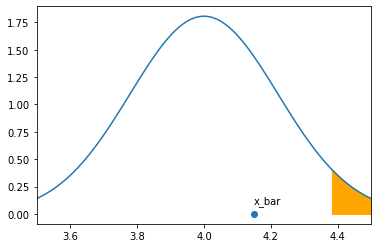

In [14]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 3.5
x_max = 4.5


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sam_std / (sam_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sam_mean, 0)
plt.annotate("x_bar", (sam_mean, 0.1))

In [15]:
# Conclusion of this t test

if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [16]:
# Conclusion by p test

p_value = 1.0 - t.cdf(np.abs(t_score), df = 19)

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.2526912478873471
Fail to reject Null Hypothesis


#### Q-3: TATA has developed a better fuel management system for the SUV segment. They claim that with this system, on average the SUV's mileage is at least 15 km/litre?

Step - 1:  
Null Hypothesis (Status Quo): 
$$ \\ H_0: \textbf{Avg Mileage  <= 15} $$
Alternate Hypothesis (Bold claim): 
$$ \\ H_1: \textbf{Avg Mileage > 15} $$


Step - 2:  
* Collect a sample of size n = 10 $$ [ 14.54, 15.63, 14.25, 13.25, 16.44, 13.58, 15.55, 14.32, 15.10, 16.78, 14.78, 14.36, 15.32, 15.22, 14.88 ] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

In [17]:
sam_val = [14.54, 15.63, 14.25, 13.25, 16.44, 13.58, 15.55, 14.32, 15.10, 16.78, 14.78, 14.36, 15.32, 15.22, 14.88 ]
sam_mean = sum(sam_val) / len(sam_val)
sam_mean

14.933333333333332

Step - 3:
Compute Test Statistic: 
* If population standard deviation is unknown 
$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

where, 

$$ s = \sqrt{\frac{\sum({x} - \bar{x})^2}{{n}-1}} $$

In [18]:
s = 0
n = len(sam_val)
for i in sam_val:
    s += (i - sam_mean)**2

sam_std = (s / (n-1))**0.5
sam_std

0.9570540115126114

In [19]:
pop_mean = 15
sam_size = len(sam_val)
t_score = (sam_mean - pop_mean) / (sam_std / sam_size**0.5)
t_score

-0.26978507653824796

In [20]:
# One tail test with 95% of confidence

# from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1 - alpha, df = 14)

t_critical

1.7613101357748562

Text(14.933333333333332, 0.1, 'x_bar')

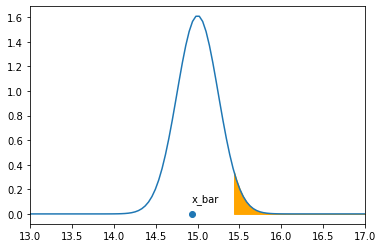

In [21]:
# Ploting the sampling distribution with rejection regions

# Defining the x minimum and x maximum
x_min = 13
x_max = 17


# Defining the sampling distribution mean and sampling distribution std
mean = pop_mean
std = sam_std / (sam_size**0.5)


# Ploting the graph and setting the x limits
x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)
plt.xlim(x_min, x_max)
plt.plot(x, y)


# Computing the right critical value (Right tailed Test)
t_critical_right = pop_mean + (t_critical * std)


# Shading the right rejection region
x1 = np.linspace(t_critical_right, x_max, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')


# Ploting the sample mean and concluding the results 
plt.scatter(sam_mean, 0)
plt.annotate("x_bar", (sam_mean, 0.1))

In [22]:
# Conclusion of this t test

if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Fail to reject Null Hypothesis


In [23]:
# Conclusion by p test

p_value = 1.0 - t.cdf(np.abs(t_score), df = 14)

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.39563073551181427
Fail to reject Null Hypothesis


#### Q-4: You have developed a new Machine Learning Application and claim that on average it takes less than 100 ms to predict for any future datapoint. How do you convince your client about this claim?

Step - 1:  
Null Hypothesis (Status Quo): 
$$ \\ H_0: \textbf{Avg time to predict in ms >= 100} $$
Alternate Hypothesis (Bold claim): 
$$ \\ H_1: \textbf{Avg time to predict in ms < 100} $$


Step - 2:  
* Collect a sample of size n = 10 $$ [ 100.0, 96.22, 99.88, 98.18, 96.66, 99.39, 98.07, 96.45, 96.43, 98.78 ] $$
* Compute sample mean $$ \bar{x} \ = \ ? $$

In [24]:
# import random
# l = []
# for x in range(20):
#     num = round(random.uniform(95, 100), 2)
#     l.append(num)

sam_val = [100.0, 96.22, 99.88, 98.18, 96.66, 99.39, 98.07, 96.45, 96.43, 98.78 ]
sam_mean = sum(sam_val) / len(sam_val)
sam_mean

98.00600000000001

Step - 3:
Compute Test Statistic: 
* If population standard deviation is unknown 
$$ t = \frac{\bar{x} - \mu}{s/\sqrt[2]{n}} $$

where, 

$$ s = \sqrt{\frac{\sum({x} - \bar{x})^2}{{n}-1}} $$
    

In [25]:
s = 0
n = len(sam_val)
for i in sam_val:
    s += (i - sam_mean)**2

sam_std = (s / (n-1))**0.5
sam_std

1.4885951617399382

In [26]:
pop_mean = 100
sam_size = len(sam_val)
t_score = (sam_mean - pop_mean) / (sam_std / sam_size**0.5)
t_score

-4.235927817342527

In [27]:
# One tail test with 95% of confidence

# from scipy.stats import t

alpha = 1 - 0.95

t_critical = t.ppf(1 - alpha, df = 9)

t_critical

1.8331129326536335

Text(98.00600000000001, 0.02, 'x_bar')

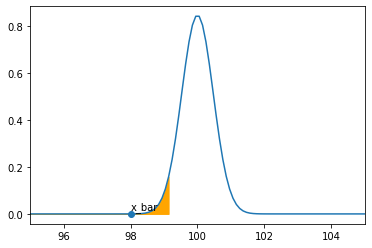

In [28]:
x_min = 95
x_max = 105

mean = pop_mean
std = sam_std / (sam_size**0.5)

x = np.linspace(x_min, x_max, 100)
y = norm.pdf(x, mean, std)

plt.xlim(x_min, x_max)
# plt.ylim(0, 0.03)

plt.plot(x, y)

t_critical_left = pop_mean + (-t_critical * std)

x1 = np.linspace(x_min, t_critical_left, 100)
y1 = norm.pdf(x1, mean, std)
plt.fill_between(x1, y1, color='orange')

plt.scatter(sam_mean, 0)
plt.annotate("x_bar", (sam_mean, 0.02))

# In this case sample mean falls in the rejection region

# i.e. Reject Null Hypothesis

In [29]:
# Conclusion of this t test

if(np.abs(t_score) > t_critical):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

Reject Null Hypothesis


In [30]:
# Conclusion by p test

p_value = 1.0 - t.cdf(np.abs(t_score), df = 9)

print("p_value = ", p_value)

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to reject Null Hypothesis")

p_value =  0.0010936959686782544
Reject Null Hypothesis
